In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("thyroid_cancer_risk_data.csv")
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [3]:
quant_vars = ["Patient_ID", "Age", "TSH_Level",	"T3_Level",	"T4_Level",	"Nodule_Size"]

cat_vars = ["Patient_ID",
"Gender",
"Country",
"Ethnicity",
"Family_History",
"Radiation_Exposure",
"Iodine_Deficiency",
"Smoking",
"Obesity",
"Diabetes",
"Thyroid_Cancer_Risk",
"Diagnosis",
]


In [4]:

# sns.pairplot(data=df, vars=quant_vars)

In [5]:
melted_quant_df = df[quant_vars].set_index('Patient_ID').stack().reset_index(name='Value').rename(columns={'level_1':'Metric'})
melted_quant_df.head()

,Patient_ID,Metric,Value
0,1,Age,66.00
1,1,TSH_Level,9.37
2,1,T3_Level,1.67
3,1,T4_Level,6.16
4,1,Nodule_Size,1.08


In [6]:
melted_cat_df = df[cat_vars].set_index('Patient_ID').stack().reset_index(name='Value').rename(columns={'level_1':'Metric'})
melted_cat_df.head()

,Patient_ID,Metric,Value
0,1,Gender,Male
1,1,Country,Russia
2,1,Ethnicity,Caucasian
3,1,Family_History,No
4,1,Radiation_Exposure,Yes


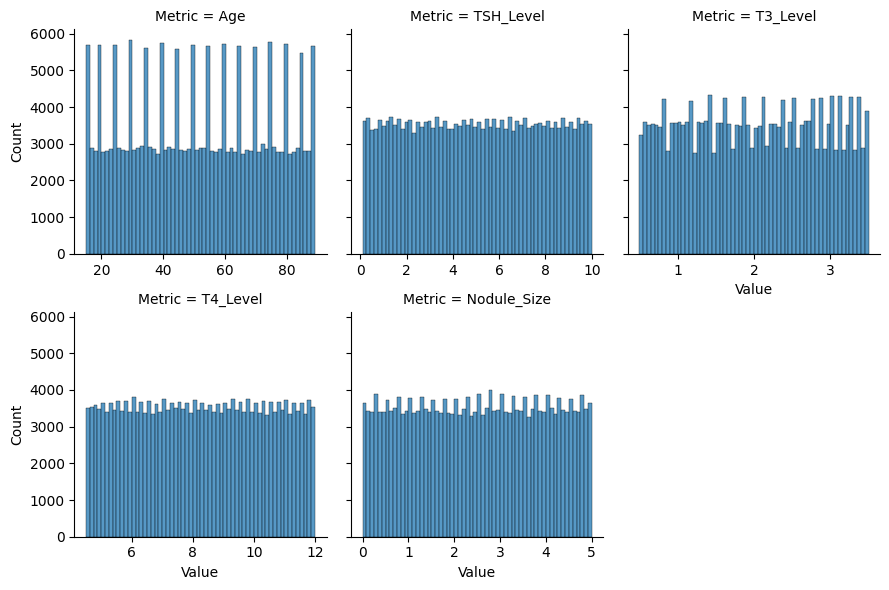

In [7]:
g = sns.FacetGrid(melted_quant_df, col="Metric", col_wrap=3, sharex=False)
g.map(sns.histplot, "Value")

c:\Users\emmaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


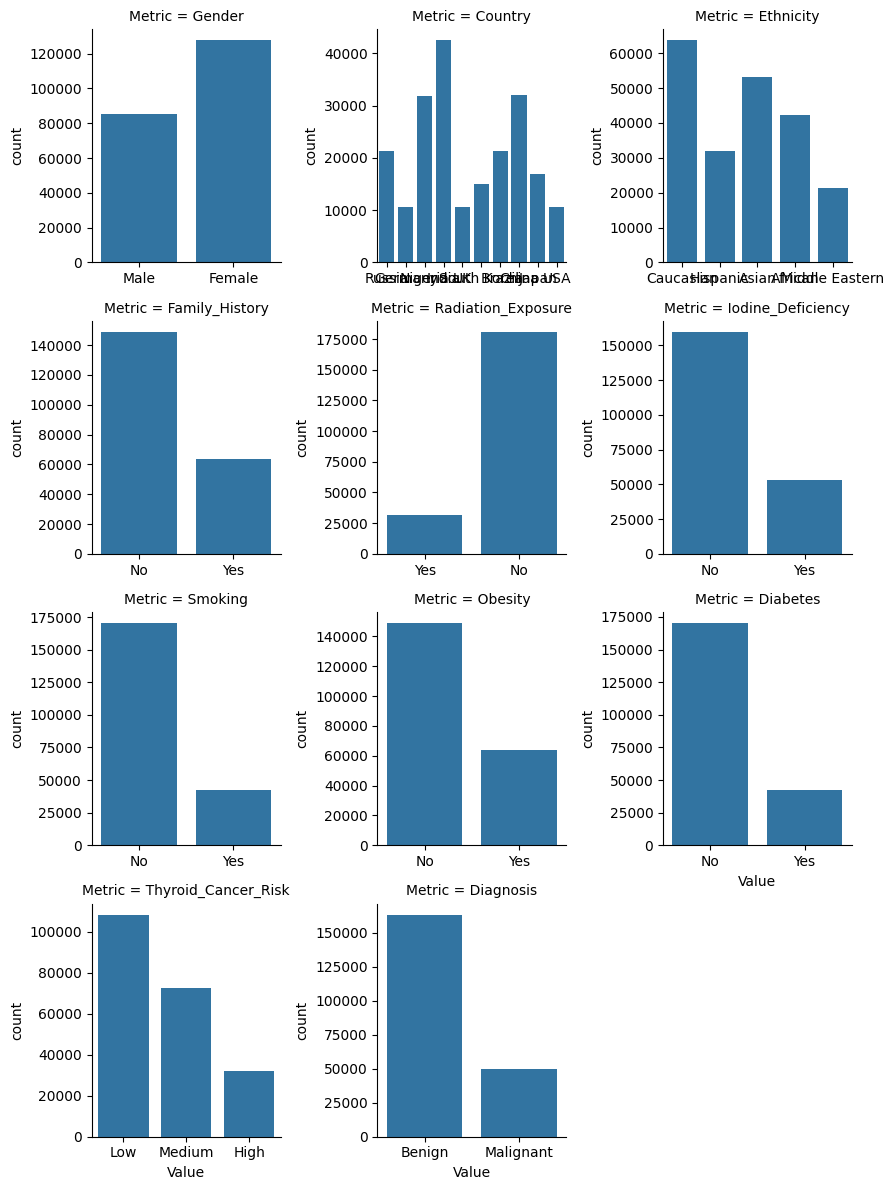

In [8]:


g = sns.FacetGrid(melted_cat_df, col="Metric", col_wrap=3, sharex=False, sharey=False)
g.map(sns.countplot, "Value")

In [ ]:
# sns.pairplot(df, hue="Thyroid_Cancer_Risk")


In [10]:
melted_quant_surv_df = df[quant_vars + ['Thyroid_Cancer_Risk']].set_index(['Patient_ID', 'Thyroid_Cancer_Risk']).stack().reset_index(name='Value').rename(columns={'level_2':'Metric'})
melted_quant_surv_df.head()

,Patient_ID,Thyroid_Cancer_Risk,Metric,Value
0,1,Low,Age,66.00
1,1,Low,TSH_Level,9.37
2,1,Low,T3_Level,1.67
3,1,Low,T4_Level,6.16
4,1,Low,Nodule_Size,1.08


In [11]:
melted_cat_surv_df = df[cat_vars].set_index(['Patient_ID', 'Thyroid_Cancer_Risk']).stack().reset_index(name='Value').rename(columns={'level_2':'Metric'})
melted_cat_surv_df.head()

,Patient_ID,Thyroid_Cancer_Risk,Metric,Value
0,1,Low,Gender,Male
1,1,Low,Country,Russia
2,1,Low,Ethnicity,Caucasian
3,1,Low,Family_History,No
4,1,Low,Radiation_Exposure,Yes


c:\Users\emmaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


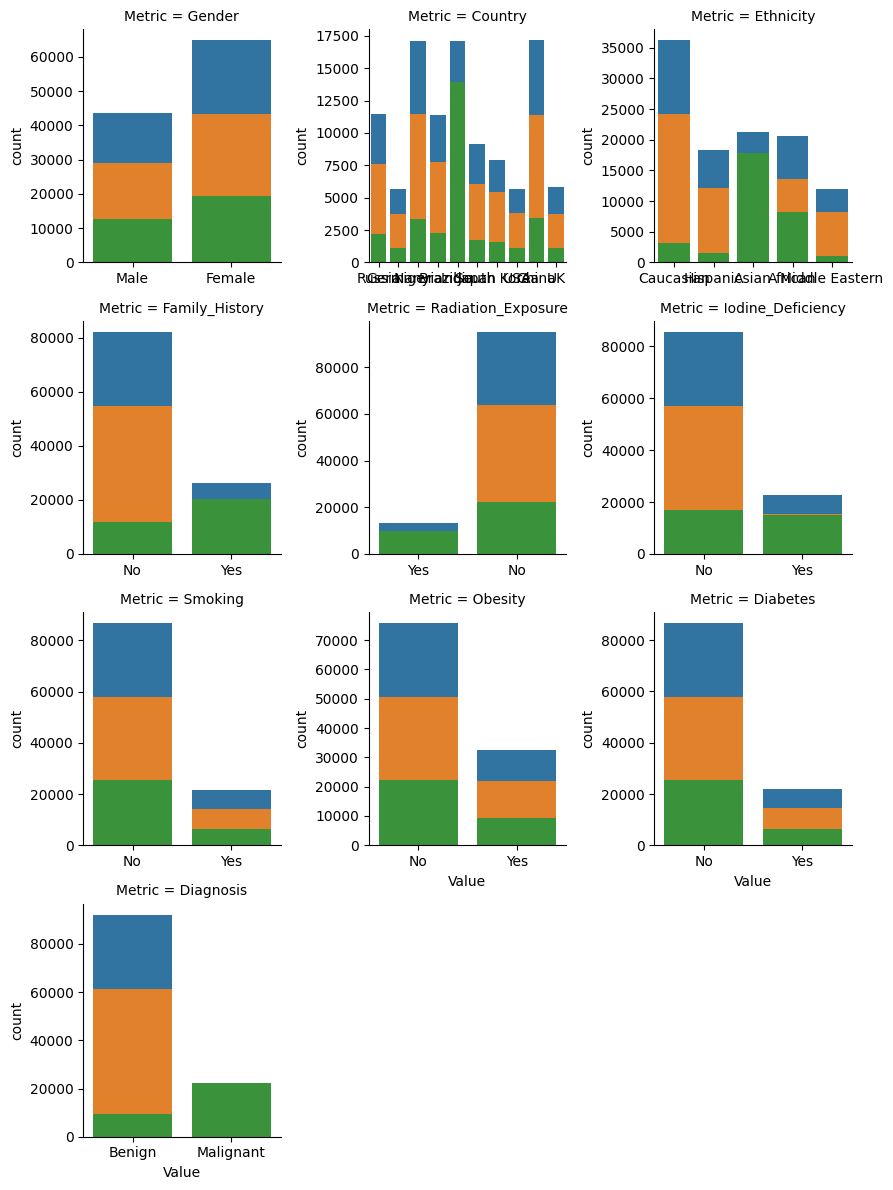

In [21]:
g = sns.FacetGrid(melted_cat_surv_df, col="Metric", hue="Thyroid_Cancer_Risk", col_wrap=3, sharex=False, sharey=False)
g.map(sns.countplot, "Value")

# # sns.catplot(melted_cat_surv_df, x='Thyroid_Cancer_Risk', row="Metric", kind="bar")

# plots = []
# for var in cat_vars[1:]:
#     p = sns.barplot(df)

<Axes: xlabel='Diagnosis', ylabel='count'>

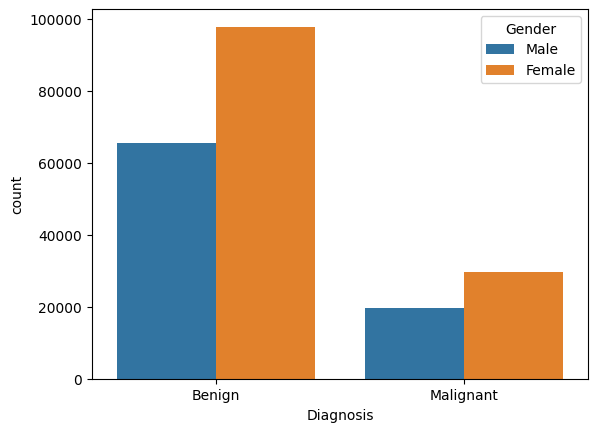

In [17]:
sns.countplot(df, x="Diagnosis", hue="Gender")

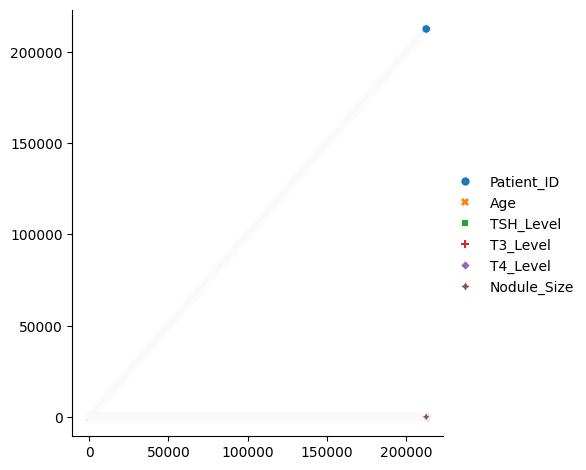

In [13]:
# g = sns.FacetGrid(melted_quant_surv_df, col="Metric", col_wrap=3, sharex=False, sharey=False)
# g.map(sns.scatterplot, "Survival_Months", "Value")

# facet_kws={'sharey': False, 'sharex': True}

sns.relplot(df)

In [14]:
sns.scatterplot(df, x="Survival_Months", y="Smoking_Pack_Years")

ValueError: Could not interpret value `Survival_Months` for `x`. An entry with this name does not appear in `data`.